# Data Science Introdução a testes estatísticos com Python
## Módulo 1
### Conhecendo dados e explorando

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import ranksums

import statsmodels
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
tmdb.describe().round(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.00,4803.00,4.803000e+03,4801.00,4803.00,4803.00
mean,2.904504e+07,57165.48,21.49,8.226064e+07,106.88,6.09,690.22
std,4.072239e+07,88694.61,31.82,1.628571e+08,22.61,1.19,1234.59
min,0.000000e+00,5.00,0.00,0.000000e+00,0.00,0.00,0.00
25%,7.900000e+05,9014.50,4.67,0.000000e+00,94.00,5.60,54.00
50%,1.500000e+07,14629.00,12.92,1.917000e+07,103.00,6.20,235.00
75%,4.000000e+07,58610.50,28.31,9.291719e+07,118.00,6.80,737.00
max,3.800000e+08,459488.00,875.58,2.787965e+09,338.00,10.00,13752.00


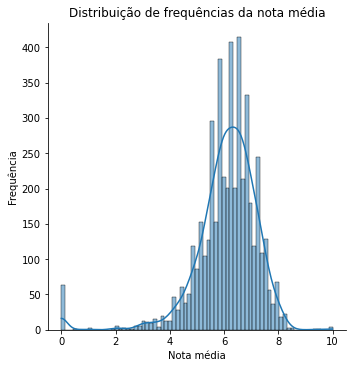

In [4]:
ax = sns.displot(tmdb.vote_average, kde = True)
ax.set(title = 'Distribuição de frequências da nota média')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nota Média do filme')

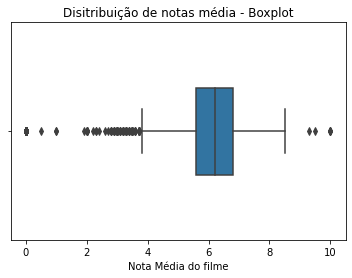

In [5]:
ax = sns.boxplot(tmdb.vote_average, width = 0.4)
ax.set(title = 'Disitribuição de notas média - Boxplot')
ax.set_xlabel('Nota Média do filme')

In [6]:
# Analisando quais filmes tem nota zero e dez (média aritimética zero)
zerados = tmdb.query('vote_average == 0')
totalizados = tmdb.query('vote_average == 10')
tmdb_10votos = tmdb.query('vote_count >= 10')

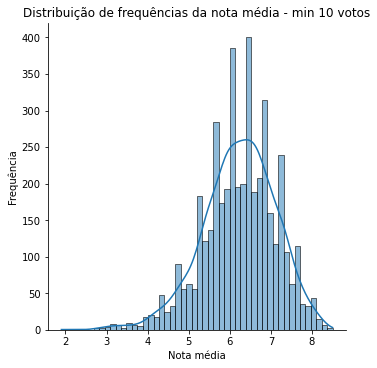

In [7]:
ax = sns.displot(tmdb_10votos.vote_average, kde = True)
ax.set(title = 'Distribuição de frequências da nota média - min 10 votos')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nota Média do filme - min 10 votos')

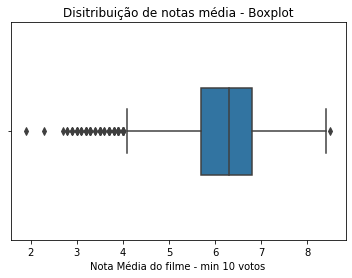

In [8]:
ax = sns.boxplot(tmdb_10votos.vote_average, width = 0.4)
ax.set(title = 'Disitribuição de notas média - Boxplot')
ax.set_xlabel('Nota Média do filme - min 10 votos')

In [9]:
notas = pd.read_csv('ratings.csv')
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
# Média agrupada por filme
media_por_filme = notas.groupby('movieId').mean()['rating']
media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

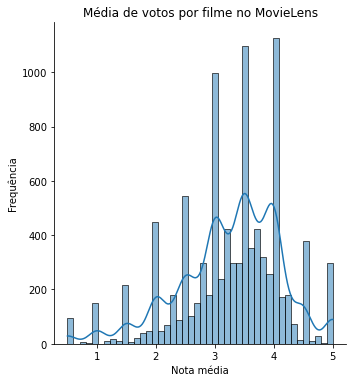

In [11]:
ax = sns.displot(media_por_filme.values, kde = True)
ax.set(title = 'Média de votos por filme no MovieLens')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

In [12]:
quantidade_votos = notas.groupby('movieId').count()
filmes_10votos = quantidade_votos.query('rating >= 10').index
filmes_10votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [13]:
# Localizando os filmes com 10 votos
nota_media_10votos = media_por_filme.loc[filmes_10votos.values]
nota_media_10votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

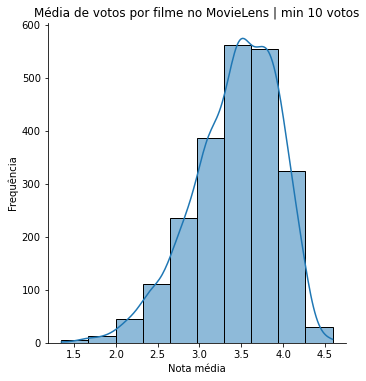

In [14]:
ax = sns.displot(nota_media_10votos.values, kde = True, bins = 10)
ax.set(title = 'Média de votos por filme no MovieLens | min 10 votos')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Nota média')

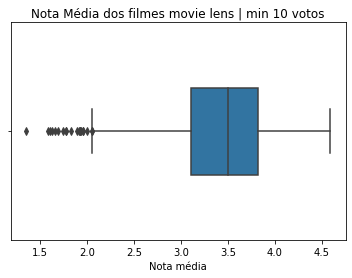

In [15]:
ax = sns.boxplot(nota_media_10votos.values, width = 0.4)
ax.set(title = 'Nota Média dos filmes movie lens | min 10 votos')
ax.set_xlabel('Nota média')

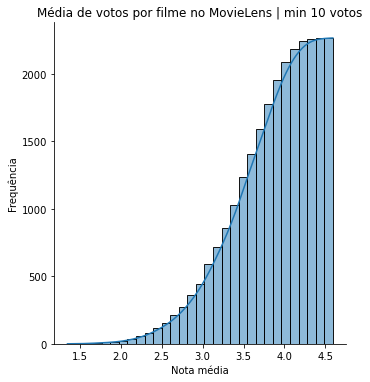

In [16]:
# visualização comulativa
ax = sns.displot(nota_media_10votos.values, kde = True, cumulative = True )
ax.set(title = 'Média de votos por filme no MovieLens | min 10 votos')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

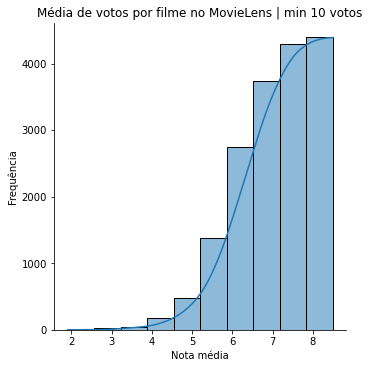

In [17]:
# visualização comulativa
ax = sns.displot(tmdb_10votos.vote_average, kde = True, cumulative = True, bins = 10)
ax.set(title = 'Média de votos por filme no MovieLens | min 10 votos')
ax.set_xlabels('Nota média')
ax.set_ylabels('Frequência')

## Módulo 2
### Explorando as distribuições das amostras

In [18]:
tmdb_10votos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4392 non-null   int64  
 1   genres                4392 non-null   object 
 2   homepage              1625 non-null   object 
 3   id                    4392 non-null   int64  
 4   keywords              4392 non-null   object 
 5   original_language     4392 non-null   object 
 6   original_title        4392 non-null   object 
 7   overview              4391 non-null   object 
 8   popularity            4392 non-null   float64
 9   production_companies  4392 non-null   object 
 10  production_countries  4392 non-null   object 
 11  release_date          4392 non-null   object 
 12  revenue               4392 non-null   int64  
 13  runtime               4391 non-null   float64
 14  spoken_languages      4392 non-null   object 
 15  status               

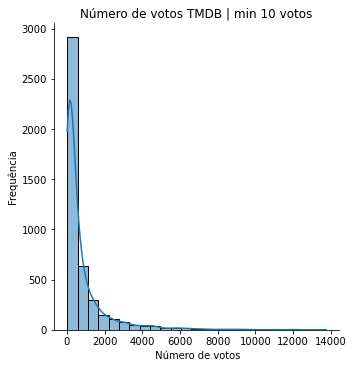

In [19]:
# Comportamento da contagem de votos
ax = sns.displot(tmdb_10votos.vote_count, kde = True, bins = 25)
ax.set(title = 'Número de votos TMDB | min 10 votos')
ax.set_xlabels(' Número de votos')
ax.set_ylabels('Frequência')

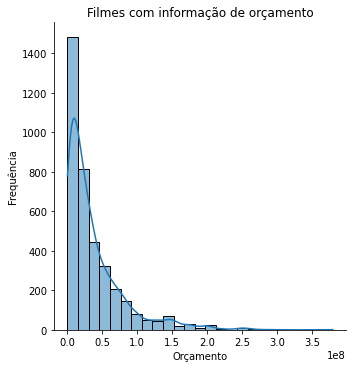

In [20]:
# Com buget superior a 0
ax = sns.displot(tmdb.query('budget > 0 ').budget, kde = True, bins = 25)
ax.set(title = 'Filmes com informação de orçamento')
ax.set_xlabels('Orçamento')
ax.set_ylabels('Frequência')

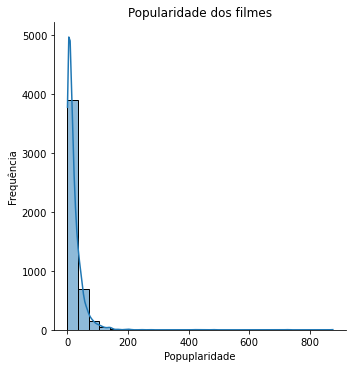

In [21]:
ax = sns.displot(tmdb.query('popularity > 0 ').popularity, kde = True, bins = 25)
ax.set(title = 'Popularidade dos filmes')
ax.set_xlabels('Popuplaridade')
ax.set_ylabels('Frequência')

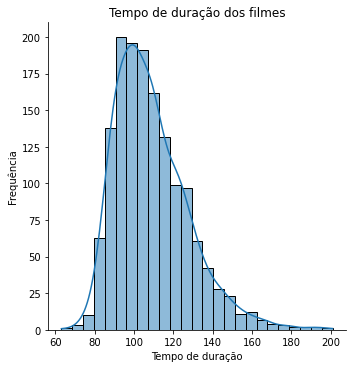

In [22]:
# Drop dos nulos e zerados
vazios = tmdb.query('runtime > 0').dropna()
ax = sns.displot(vazios.runtime, kde = True, bins = 25)
ax.set(title = 'Tempo de duração dos filmes')
ax.set_xlabels('Tempo de duração')
ax.set_ylabels('Frequência')

## Módulo 3
### Testes de uma amostra

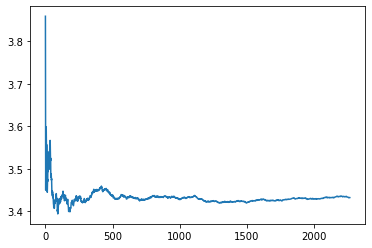

In [23]:
# Criando uma amostra aleatória
np.random.seed(75243)
temp = nota_media_10votos.sample(frac = 1)
medias = list()
medias = [temp [0:i].mean() for i in range (1, len(temp))]
plt.plot(medias)

In [24]:
# Intervalo de confiança dos dados com teste Z
zconfint(nota_media_10votos)

(3.4112459477469557, 3.452854733323563)

In [25]:
# Descrição dos dados e teste T de confiança
descri_todos = DescrStatsW(nota_media_10votos)
descri_todos.tconfint_mean()

(3.41123483922938, 3.4528658418411386)

## Modulo 4
### Outros testes

In [26]:
filmes = pd.read_csv('movies.csv')
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [27]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


[Text(0.5, 1.0, 'Distribuição para notas de Toy Story')]

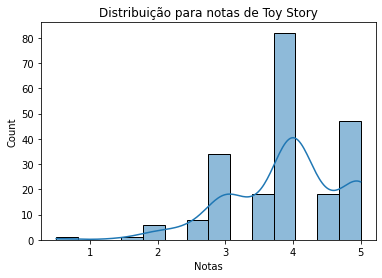

In [28]:
ax = sns.histplot(notas1.rating, kde = True)
ax.set_xlabel('Notas')
ax.set(title = 'Distribuição para notas de Toy Story')

[Text(0.5, 1.0, 'Boxplot da distribuição de notas para Toy Story')]

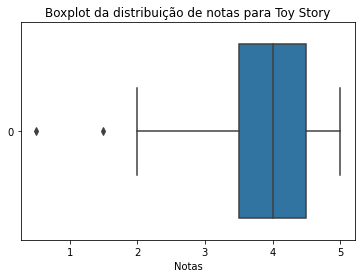

In [29]:
ax = sns.boxplot(data = notas1.rating, orient = 'h')
ax.set_xlabel('Notas')
ax.set(title = 'Boxplot da distribuição de notas para Toy Story')

In [30]:
notas1.rating.mean()

3.9209302325581397

In [31]:
# Intervalo de confiança
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [32]:
ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

## Módulo 5
### Teste para duas amostras

In [33]:
# Intervalo de confiança entre as distribuições 
zconfint(notas1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

In [34]:
# Teste de dois conjuntos
ztest(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)

In [35]:
ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [36]:
# Comparações de médias
descri_todos = DescrStatsW(notas.rating)
decri_toystory = DescrStatsW(notas1.rating)
comparacao = descri_todos.get_compare(decri_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

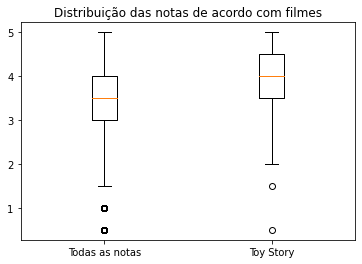

In [37]:
# Visualização gráfica
ax = plt.boxplot([notas.rating, notas1.rating], labels = ['Todas as notas', 'Toy Story'])
plt.title('Distribuição das notas de acordo com filmes')

## Módulo 6
### Testes não paramétricos

In [38]:
notas1 = notas.query('movieId == 1')
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')
filmes.query('movieId in [1,593,72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


<AxesSubplot:xlabel='movieId', ylabel='rating'>

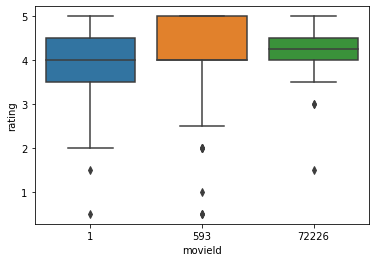

In [39]:
# boxplot de vários filmes
ax = sns.boxplot(x = 'movieId', y = 'rating', data = notas.query('movieId in (1,593,72226)'))
ax

In [40]:
# ùnica diferença significativa no teste T
descri_1 = DescrStatsW(notas1.rating)
descri_593 = DescrStatsW(notas593.rating)
comparacao = descri_1.get_compare(descri_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [41]:
descri_593 = DescrStatsW(notas593.rating)
descri_72226 = DescrStatsW(notas72226.rating)
comparacao = descri_593.get_compare(descri_72226)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


In [42]:
comparacao = descri_1.get_compare(descri_72226)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [43]:
# a = 0.05 
# Teste de distribuição normal
stat,p = normaltest(notas1.rating)
p

0.00011053430732728716

In [44]:
# Teste não paramétrico - a 0.05
# hipótese nula: as distribuições são iguais - DESCARTADA
_, p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693